<h1>Importing Libraries</h1>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
import re

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

<h1>Importing the Dataset</h1>

In [12]:
train = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin')
test = pd.read_csv('Corona_NLP_test.csv', encoding = 'latin')
df = pd.concat([train,test])

<h1>Dropping the Unused Columns</h1>

In [13]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [14]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


Dropping the Column (TweetAt and Location)

In [15]:
df = df.drop('TweetAt', axis = 1)

In [16]:
df = df.drop('Location', axis = 1)

In [17]:
df.dropna(inplace=True)
df = df.drop_duplicates()

In [18]:
df.columns

Index(['UserName', 'ScreenName', 'OriginalTweet', 'Sentiment'], dtype='object')

In [19]:
df.tail()

,UserName,ScreenName,OriginalTweet,Sentiment
3793,3794,48746,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,Gov need to do somethings instead of biar je r...,Extremely Negative
3797,3798,48750,I and @ForestandPaper members are committed to...,Extremely Positive


<h1>Exploring the Data</h1>

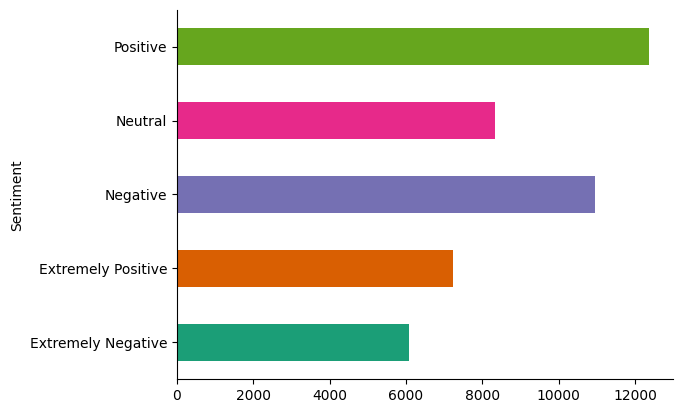

In [20]:
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

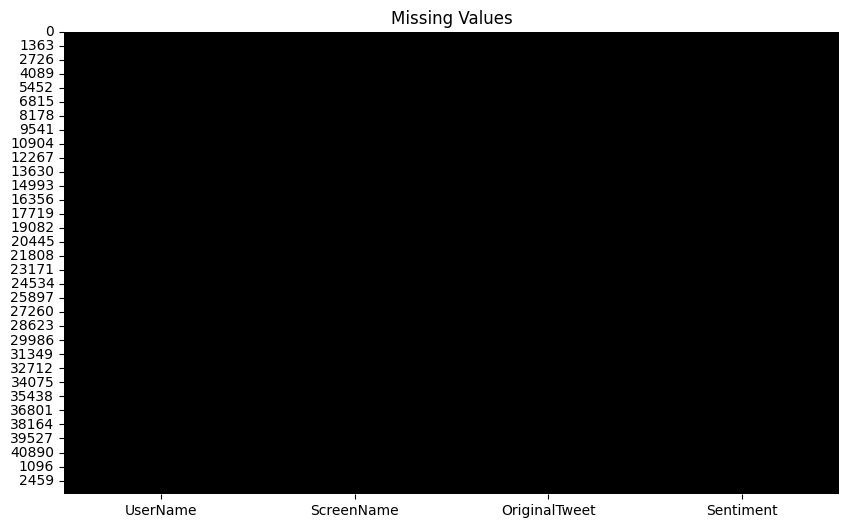

In [21]:
missing_data = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='gray')
plt.title('Missing Values')
plt.show()

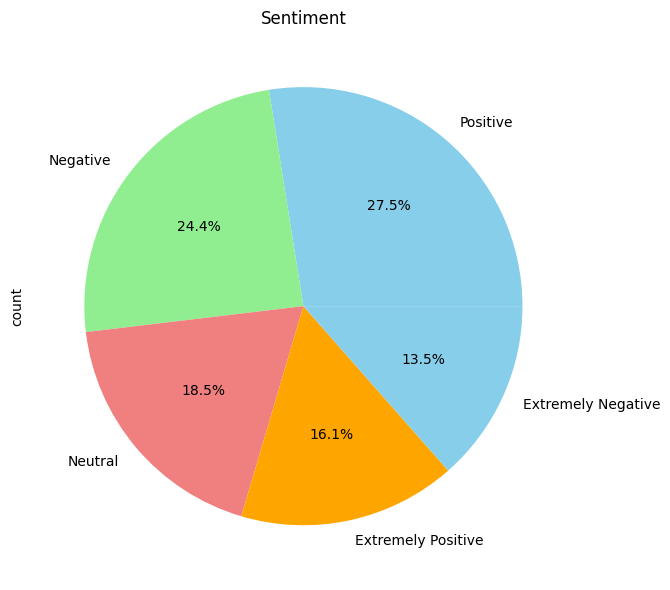

In [22]:
value_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Sentiment')
plt.tight_layout()
plt.show()

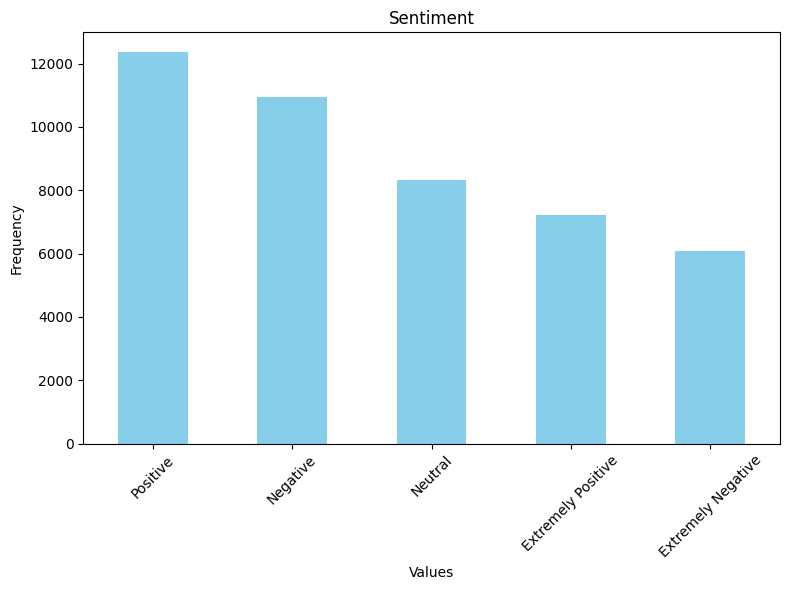

In [23]:
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df.dtypes

UserName          int64
ScreenName        int64
OriginalTweet    object
Sentiment        object
dtype: object

<h1>Without Removing the URL's, Https, Stopwords</h1>

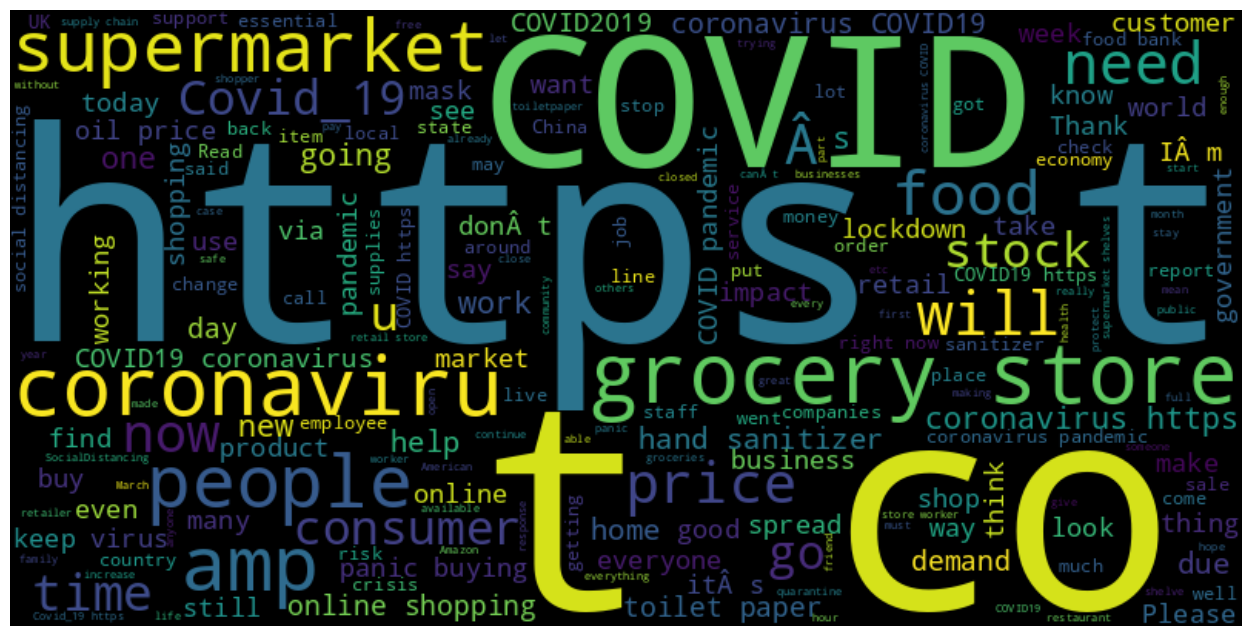

In [25]:
text = ' '.join(df['OriginalTweet'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h1>After Removing the URL's, Https, Stopwords</h1>

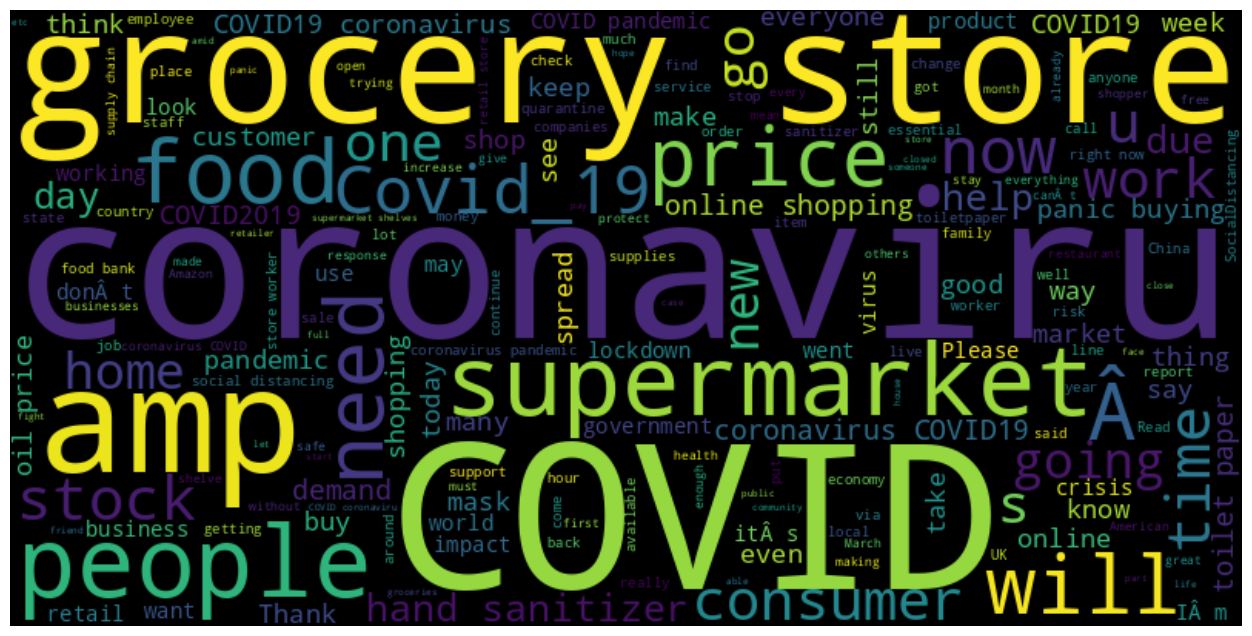

In [26]:
text = ' '.join(df['OriginalTweet'])
#removing the https URL's
text = re.sub(r'http\S+', '', text)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
X = df['OriginalTweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [50]:
vectorizer = TfidfVectorizer(max_features=72500)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [51]:
model = LogisticRegression(max_iter=72500)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 57.88010232454677
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.50      0.56      1193
Extremely Positive       0.68      0.58      0.63      1456
          Negative       0.51      0.53      0.52      2137
           Neutral       0.66      0.66      0.66      1686
          Positive       0.52      0.61      0.56      2519

          accuracy                           0.58      8991
         macro avg       0.60      0.57      0.58      8991
      weighted avg       0.59      0.58      0.58      8991

